In [1]:
import numpy as np
from keras.preprocessing import image
from pathlib import Path

In [50]:
# gives object of path
p = Path("../Datasets/machine-learning-online-2018-master/Datasets/Images/images/")
print(p)

../Datasets/machine-learning-online-2018-master/Datasets/Images/images


In [51]:
# gives address of 
dirs = p.glob("*")

# iterating over all dirs
print(dirs)
print(type(dirs))

<generator object Path.glob at 0x7fcd09cd9550>
<class 'generator'>


In [52]:
labels = []
image_data = []

label_dict = {"dogs":0, "cats":1, "horses":2, "humans":3}


for folder_name in dirs:
    # label for mapping
    label = str(folder_name).split("\\")[-1]
    label = label.split('/')[-1]
    
    for img_path in folder_name.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(32,32))
        image_arr = image.img_to_array(img)
        
        # append at correct position
        image_data.append(image_arr)
        labels.append(label_dict[label])

In [53]:
print(len(labels))

808


In [54]:
# to work on data convert into numpy
image_data = np.array(image_data,dtype="float32")/255.0
labels = np.array(labels)

In [55]:
# image X (x-axis) X (y-axis) X (channel)
print(image_data.shape)
print(labels.shape)

(808, 32, 32, 3)
(808,)


In [56]:
# shuffle entire data bcoz currently it's all sorted
# NOTE : don't forget to link id's else id's would change

combine = list(zip(image_data,labels))
np.random.shuffle(combine)

# Un-zip
image_data[:],labels[:] = zip(*combine)

In [57]:
print(image_data[:,5],labels[:5])

[[[0.22745098 0.22745098 0.32941177]
  [0.2627451  0.2627451  0.3647059 ]
  [0.25882354 0.25882354 0.36078432]
  ...
  [0.24313726 0.24313726 0.34509805]
  [0.22745098 0.23137255 0.3137255 ]
  [0.16862746 0.16078432 0.16470589]]

 [[0.29803923 0.30588236 0.05098039]
  [0.3529412  0.3019608  0.09411765]
  [0.57254905 0.4392157  0.2509804 ]
  ...
  [0.41568628 0.35686275 0.20392157]
  [0.44705883 0.40784314 0.2       ]
  [0.5529412  0.47843137 0.21960784]]

 [[0.92156863 0.9137255  0.91764706]
  [0.92156863 0.9137255  0.91764706]
  [0.9137255  0.90588236 0.9098039 ]
  ...
  [0.9137255  0.9098039  0.9019608 ]
  [0.93333334 0.93333334 0.93333334]
  [0.9411765  0.9411765  0.9411765 ]]

 ...

 [[0.5568628  0.5647059  0.5137255 ]
  [0.5686275  0.5686275  0.52156866]
  [0.5647059  0.57254905 0.52156866]
  ...
  [0.17254902 0.15294118 0.12941177]
  [0.20392157 0.20784314 0.15294118]
  [0.50980395 0.5176471  0.46666667]]

 [[0.8980392  0.90588236 0.9019608 ]
  [0.9098039  0.91764706 0.9137255 ]


## VISUALIZE DATA

In [58]:
import matplotlib.pyplot as plt

In [59]:
def drawImg(mat):
    plt.axis("off")
    plt.imshow(mat)
    plt.show()

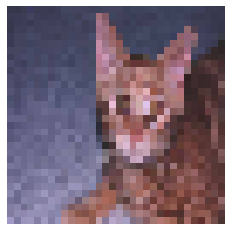

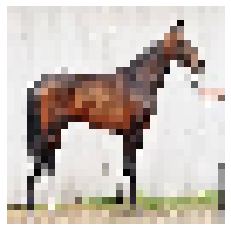

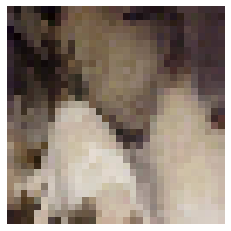

In [60]:
drawImg(image_data[0])
drawImg(image_data[2])
drawImg(image_data[100])

In [61]:
class SVM:
    
    def __init__(self,C=1.0):
        
        self.C = C
        self.W = 0
        self.b = 0
    
    def hingeLoss(self,X,y,W):
        loss = 0.0
        
        loss += .5*np.dot(W,W.T)
        m,n = X.shape
        bias = self.b
        
        for i in range(m):
            ti = y[i]*(np.dot(W,X[i])+bias)
            loss += self.C * max(0,1-ti)
        
        return loss[0][0]
    
    def fit(self,X,y,maxItr=300,LR=0.001,batch_size=100):
        
        m,n = X.shape
        W = np.zeros((1,n))
        
        c = self.C
        bias = self.b
        
        losses = []
        # calc gradient first then update    
        ids = np.arange(0,m)
        np.random.shuffle(ids)
        
        # will perform gradient desent maxItr times
        for i in range(maxItr):
            
            loss = self.hingeLoss(X,y,W)
            losses.append(loss)
        
            # acc to ppr do in batch
            for batch in range(0,m,batch_size):
                
                gradw = 0.0
                gradb = 0.0
                
                for j in range(batch,batch+batch_size):
                    if j<m:
                        i = ids[j]
                        ti = y[i] * (np.dot(W,X[i]) + bias)
                        
                        if ti >= 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*X[i]*y[i]
                            gradb += c*y[i]
                
                # update
                W = W - LR*W + LR*gradw
                bias = bias + LR*gradb
                self.W = W
                self.b = bias
                
        return W,bias,losses     

In [62]:
image_data = image_data.reshape(image_data.shape[0],-1)
print(image_data.shape)

(808, 3072)


In [63]:
no_of_labels = np.unique(labels)

def distributionAccToLabels(image_data,labels):
    image_dict = {}
    # created dict of list
    for i in no_of_labels:
        image_dict[i] = []
    
    for i in range(image_data.shape[0]):
        cur_label = labels[i]
        image_dict[cur_label].append(image_data[i])
    
    for i in no_of_labels:
        image_dict[i] = np.array(image_dict[i])
    
    return image_dict
    

In [66]:
image_dict = distributionAccToLabels(image_data,labels)
print(image_dict[0].shape)

(202, 3072)


In [77]:
def getDataMatrix(d1,d2):
    
    len1,len2 = d1.shape[0],d2.shape[0]
    feature = d1.shape[1]
    data = np.zeros((len1+len2,feature))
    label = np.zeros((len1+len2,))
    
    data[:len1,:] = d1
    data[len1:,:] = d2
    
    label[:len1] = 1
    label[len1:] = -1
    
    return data,label

In [78]:
data,label = getDataMatrix(image_dict[0],image_dict[1])

In [79]:
print(data)

[[0.36470589 0.32549021 0.32941177 ... 0.77254903 0.74901962 0.69411767]
 [0.72156864 0.75686276 0.7764706  ... 0.60000002 0.39607844 0.09803922]
 [0.25098041 0.25098041 0.11764706 ... 0.01176471 0.01176471 0.00392157]
 ...
 [1.         0.97254902 0.97647059 ... 0.98823529 0.99215686 0.97254902]
 [0.23921569 0.24313726 0.22352941 ... 0.36862746 0.32156864 0.25882354]
 [0.98823529 0.98823529 0.98823529 ... 0.60784316 0.78039217 0.89411765]]


In [80]:
print(label)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

In [93]:
mySVM = SVM(1.0)
xp,yp = getDataMatrix(image_dict[0],image_dict[1])
data,lab,loss = mySVM.fit(xp,yp,LR=0.000001,maxItr=1000)


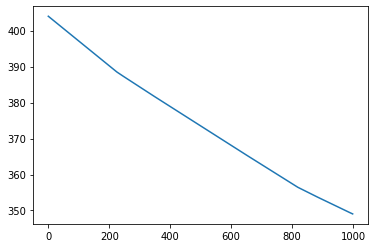

In [94]:
plt.plot(loss)